# Importing necessary Libraries of python


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv("ds_salaries.csv")    # Reading the CSv File

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [30]:
df.shape    #Checking for the shape of the data

(3755, 11)

In [31]:
df.columns   #To find columns in the dataset

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
#identifying Numerical Columns

In [6]:
num_col=df.select_dtypes(include=["int64", "float64"]).columns
cat_col= df.select_dtypes(include=["object","category"]).columns
print("Numerical Columns are",num_col)
print("\n")
print("Categorical Columns are",cat_col)

Numerical Columns are Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')


Categorical Columns are Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


# Descriptive Statistics

In [7]:
df.describe()    

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [32]:
df1=df.groupby("job_title")["salary_in_usd"]  # Grouping Job Title

In [33]:
df1.describe() 

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,4.0,21352.250000,20046.470685,5409.0,8852.25,15000.0,27500.0,50000.0
AI Developer,11.0,136666.090909,95973.553918,6304.0,69702.50,108000.0,207309.0,300000.0
AI Programmer,2.0,55000.000000,21213.203436,40000.0,47500.00,55000.0,62500.0,70000.0
AI Scientist,16.0,110120.875000,111733.541359,12000.0,31140.00,52500.0,200000.0,423834.0
Analytics Engineer,103.0,152368.631068,53838.467623,7500.0,116775.00,143860.0,185200.0,289800.0
...,...,...,...,...,...,...,...,...
Research Engineer,37.0,163108.378378,55055.424934,60000.0,120000.00,155000.0,200000.0,293000.0
Research Scientist,82.0,161214.195122,74944.431627,23000.0,104579.00,150000.0,200000.0,450000.0
Software Data Engineer,2.0,62510.000000,17691.811665,50000.0,56255.00,62510.0,68765.0,75020.0


# Finding the details of Job with highest salary

In [10]:
df[df["salary_in_usd"]==df["salary_in_usd"].max()]   

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M


# Finding the details of Job with lowest salary

In [11]:
df[df["salary_in_usd"]==df["salary_in_usd"].min()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M


In [12]:
df.isna().sum() # Checking if there is any null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Data Visualization

# #Histogram of Salaries

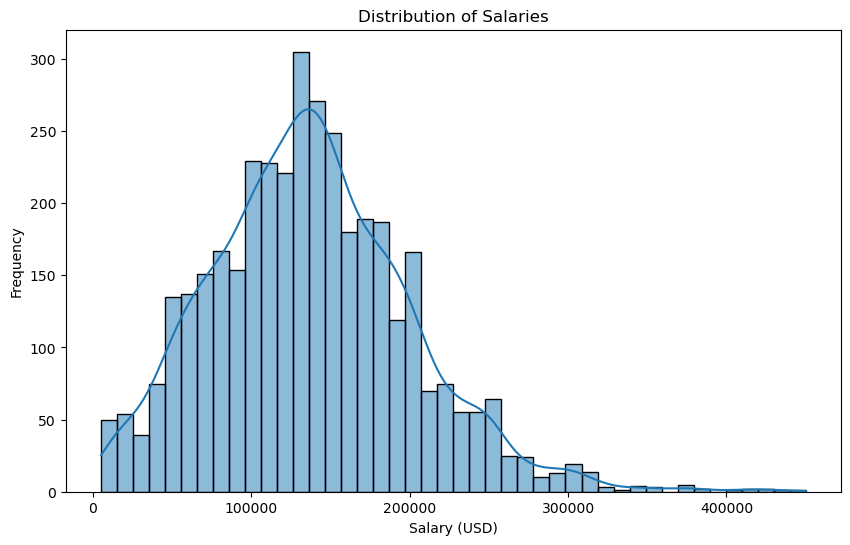

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()


# Boxplot of Salaries by Experience Level

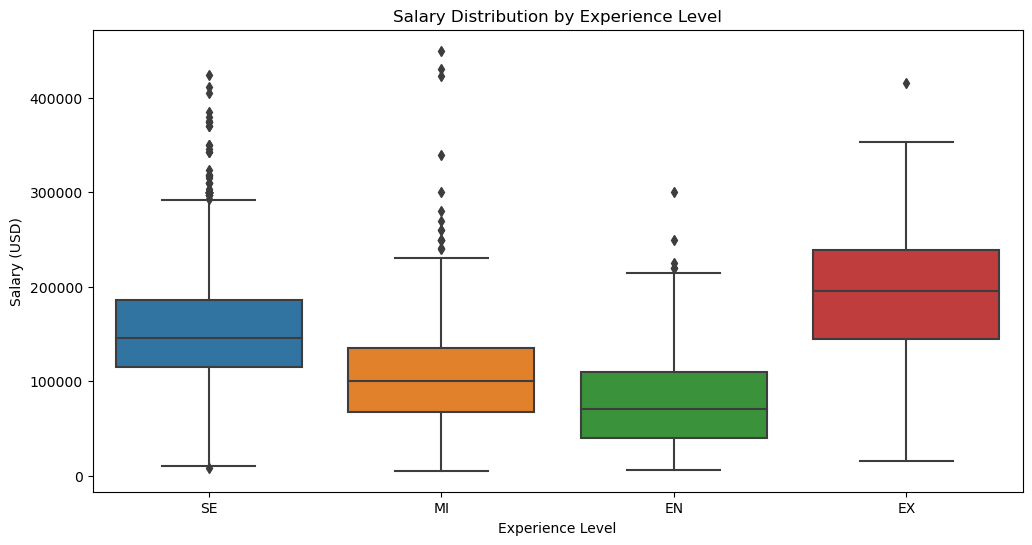

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)

plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Experience Level')
plt.show()


# Salary Trend over time

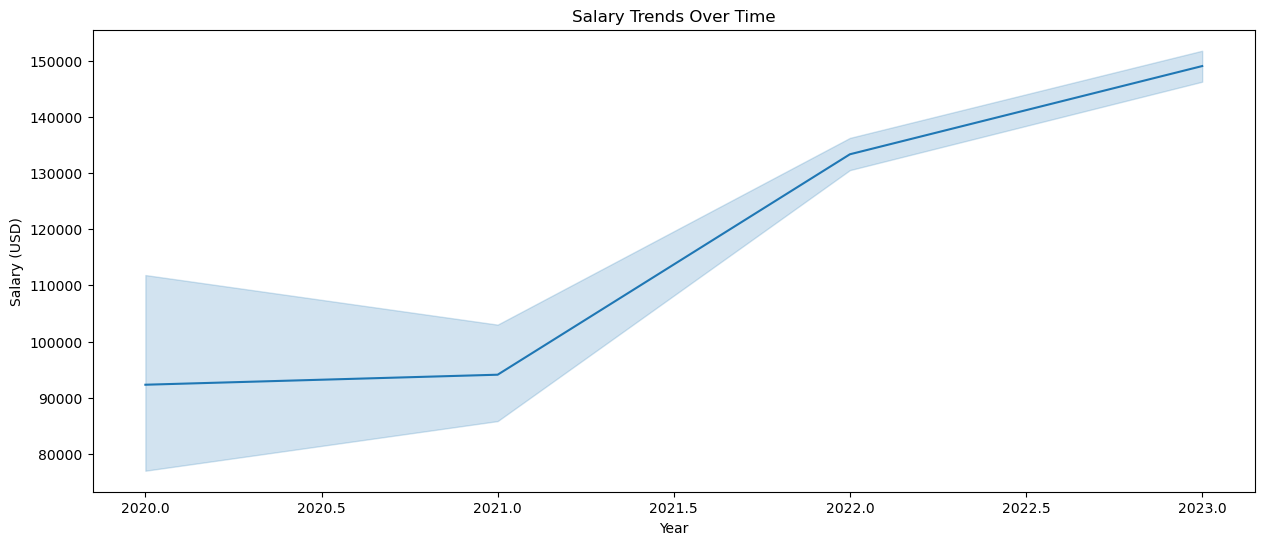

In [21]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df)
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.title('Salary Trends Over Time')
plt.show()


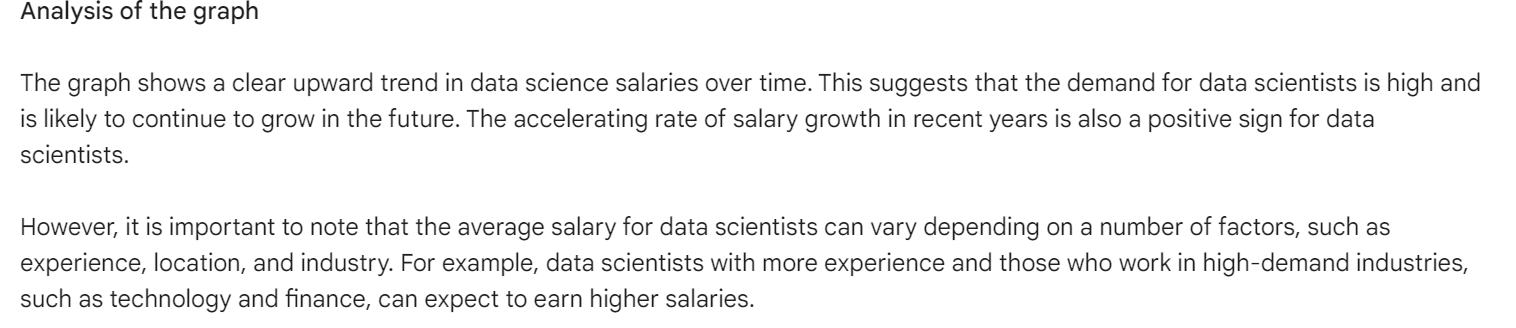

# Salary Distribution by Employment Type

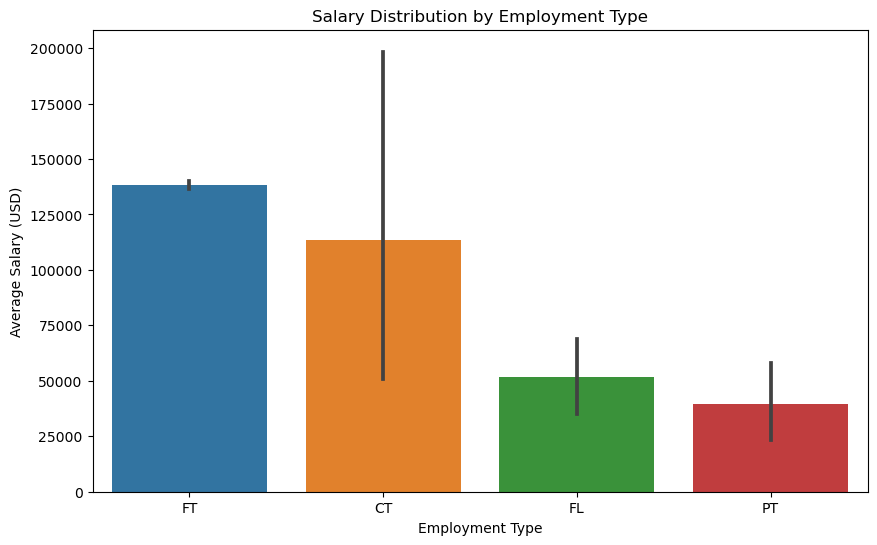

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary_in_usd', data=df)
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Salary Distribution by Employment Type')
plt.show()


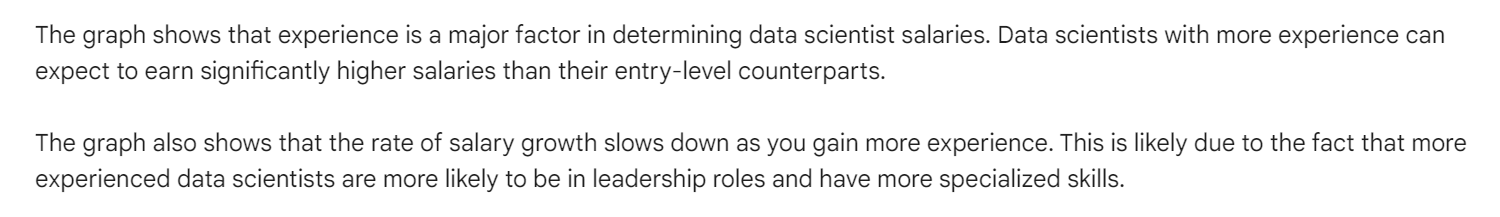

# Correlation Heatmap


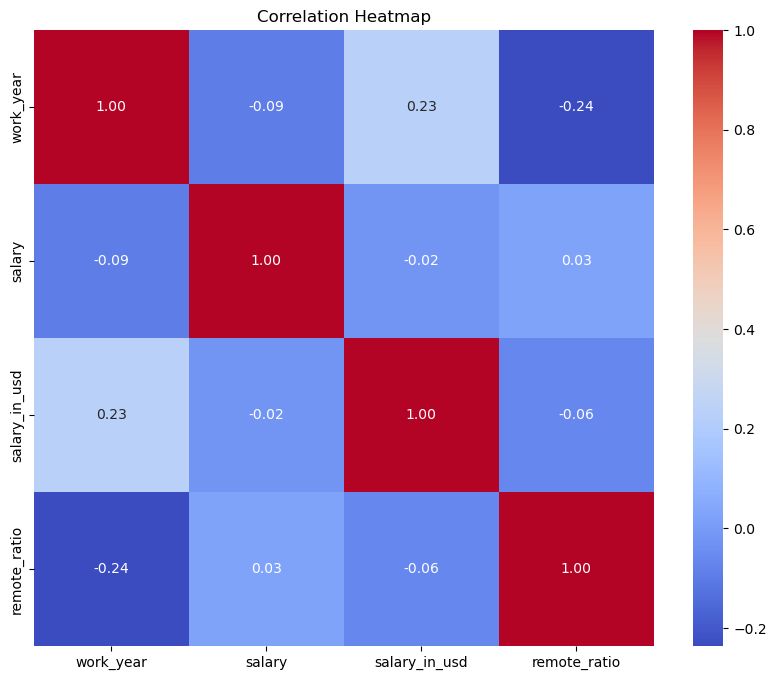

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


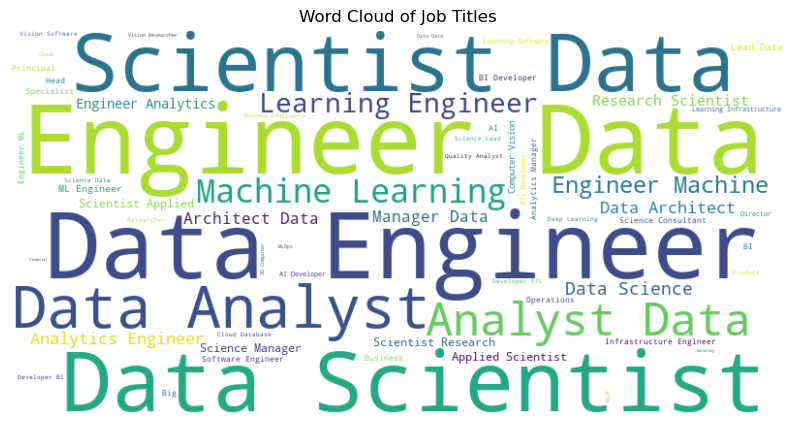

In [26]:
from wordcloud import WordCloud

job_titles = ' '.join(df['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Job Titles')
plt.show()


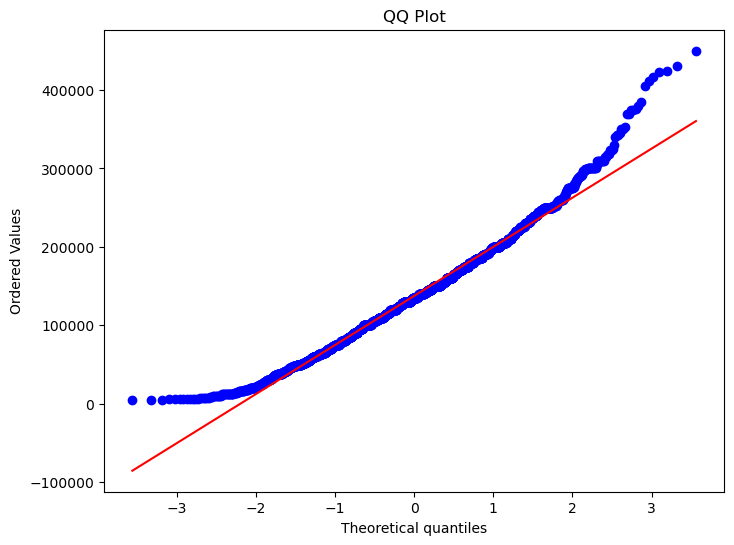

In [27]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['salary_in_usd'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


# The above QQ Plot shows that The didtribution of the "Salaries_in_usd" is right skewed/postively skewed